<a href="https://colab.research.google.com/github/surendarmanoj/data-science/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
from sklearn.datasets import make_regression, load_diabetes
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [8]:
X,y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1,noise=80,random_state=13)

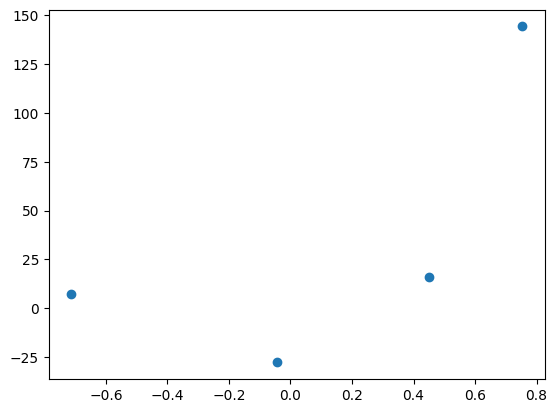

In [9]:
plt.scatter(X,y)

In [11]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [13]:
reg.coef_

array([78.35063668])

In [14]:
reg.intercept_

np.float64(26.15963284313262)

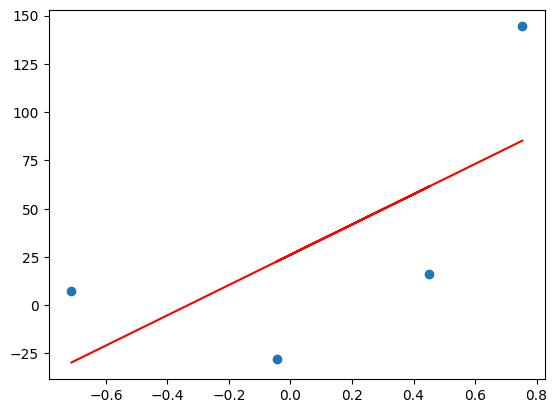

In [15]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red')


In [22]:
y_pred = ((78.35 * X) + 100).reshape(4)

In [23]:
y_pred

array([ 44.18419163, 135.39949674,  96.51318381, 159.05759577])

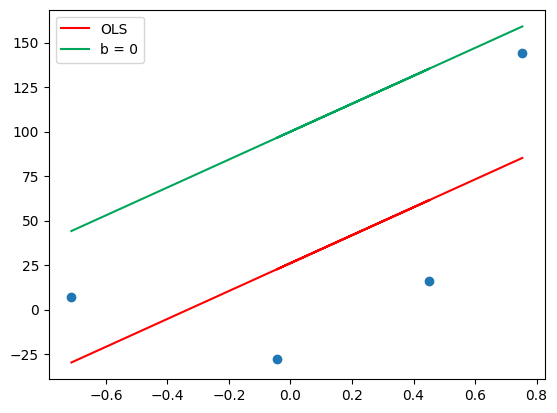

In [26]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,color='#00a65a',label='b = 0')
plt.legend()
plt.show()

In [27]:
m = 78.35
b = 100

loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

np.float64(590.7223659179078)

In [28]:
lr = 0.1

In [29]:
step_size = loss_slope * lr
step_size

np.float64(59.072236591790784)

In [30]:
b = b - step_size
b

np.float64(40.927763408209216)

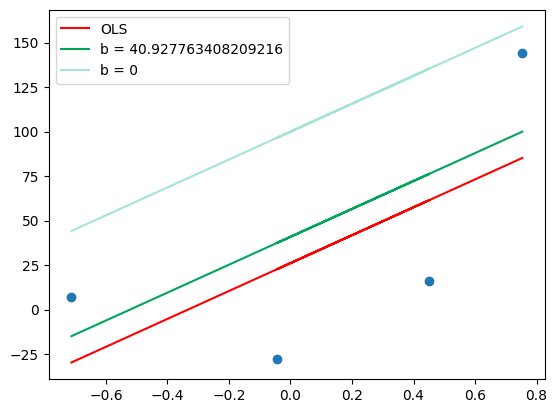

In [31]:
y_pred1 = ((78.35 * X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred1,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

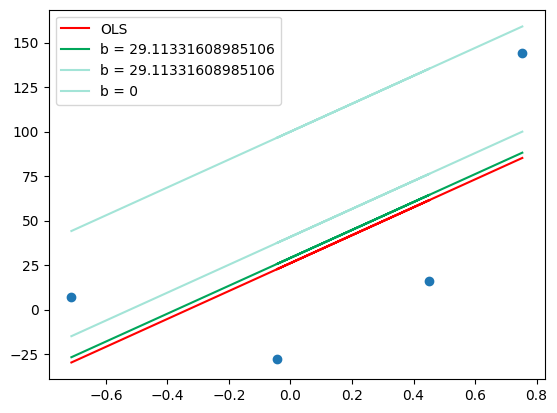

In [33]:
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope
step_size = loss_slope*lr
step_size
b = b - step_size
b
y_pred2 = ((78.35 * X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred2,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()


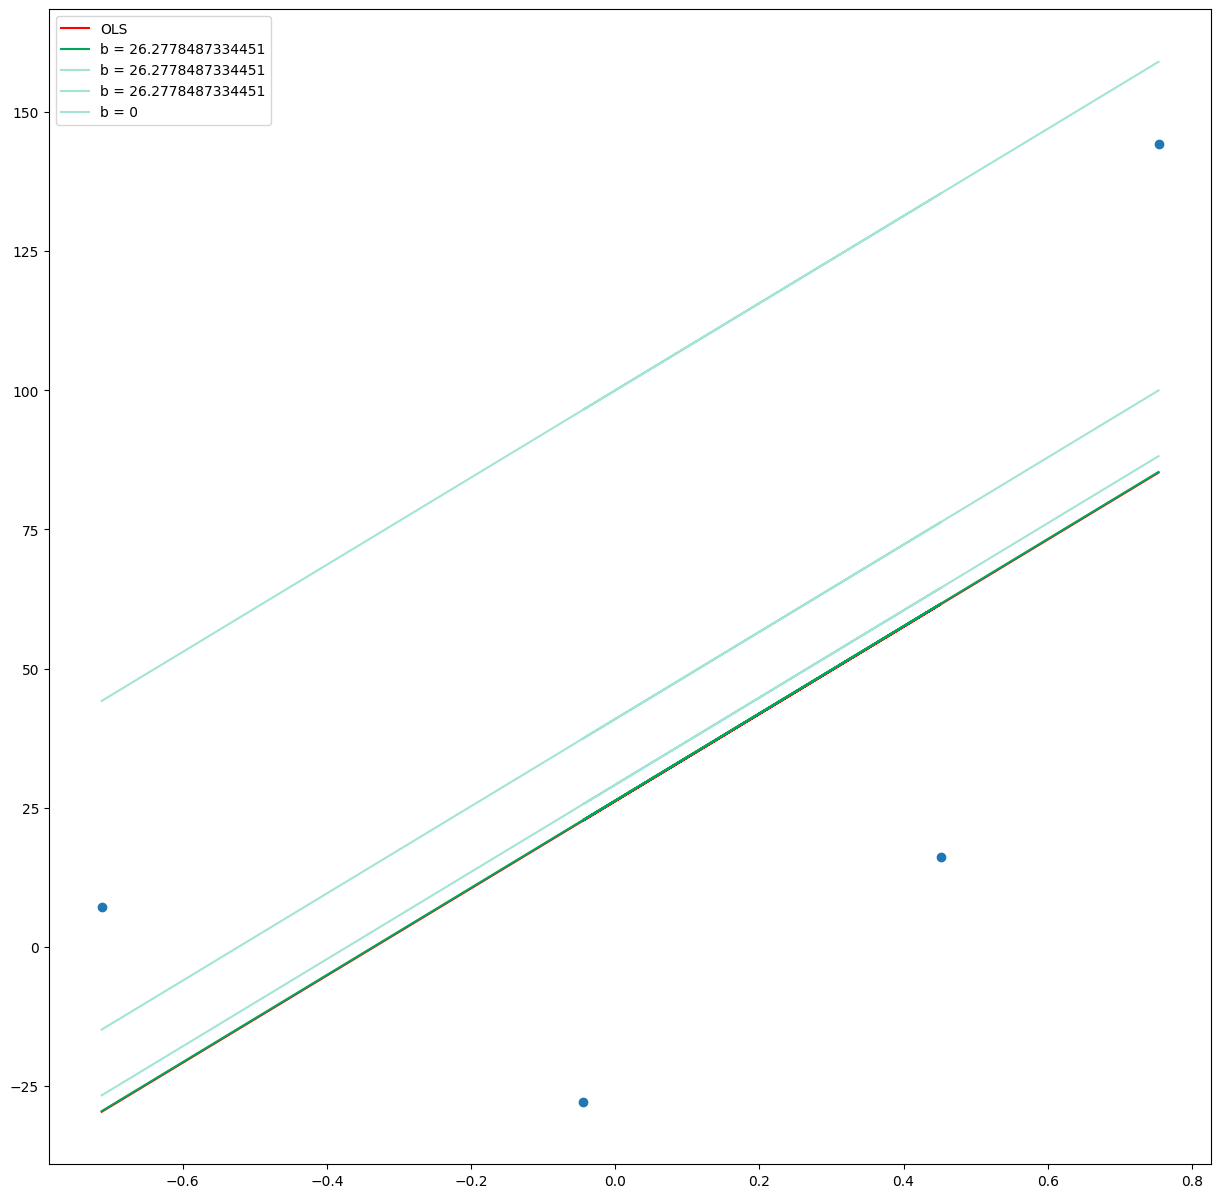

In [35]:
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope
step_size = loss_slope*lr
step_size
b = b - step_size
b
y_pred3 = ((78.35 * X) + b).reshape(4)

plt.figure(figsize=(15,15))
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred3,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred2,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

In [37]:
X,y = load_diabetes(return_X_y=True)

In [38]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [40]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [41]:
print(reg.coef_)
print(reg.intercept_)

[  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
151.88331005254167


In [42]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4399338661568968

In [43]:
X_train.shape

(353, 10)

In [44]:
class GDRegressor:

    def __init__(self,learning_rate=0.01,epochs=100):

        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self,X_train,y_train):
        # init your coefs
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])

        for i in range(self.epochs):
            # update all the coef and the intercept
            y_hat = np.dot(X_train,self.coef_) + self.intercept_
            #print("Shape of y_hat",y_hat.shape)
            intercept_der = -2 * np.mean(y_train - y_hat)
            self.intercept_ = self.intercept_ - (self.lr * intercept_der)

            coef_der = -2 * np.dot((y_train - y_hat),X_train)/X_train.shape[0]
            self.coef_ = self.coef_ - (self.lr * coef_der)

        print(self.intercept_,self.coef_)

    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [45]:
gdr = GDRegressor(epochs=1000,learning_rate=0.5)

In [46]:
gdr.fit(X_train,y_train)

152.01351687661833 [  14.38990585 -173.7235727   491.54898524  323.91524824  -39.32648042
 -116.01061213 -194.04077415  103.38135565  451.63448787   97.57218278]


In [47]:
y_pred = gdr.predict(X_test)

In [48]:
r2_score(y_test,y_pred)

0.4534503034722803

In [49]:
class SGDRegressor:

    def __init__(self,learning_rate=0.01,epochs=100):

        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self,X_train,y_train):
        # init your coefs
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])

        for i in range(self.epochs):
            for j in range(X_train.shape[0]):
                idx = np.random.randint(0,X_train.shape[0])

                y_hat = np.dot(X_train[idx],self.coef_) + self.intercept_

                intercept_der = -2 * (y_train[idx] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr * intercept_der)

                coef_der = -2 * np.dot((y_train[idx] - y_hat),X_train[idx])
                self.coef_ = self.coef_ - (self.lr * coef_der)

        print(self.intercept_,self.coef_)

    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [50]:
sgd = SGDRegressor(learning_rate=0.01,epochs=40)

In [52]:
sgd.fit(X_train,y_train)
y_pred = sgd.predict(X_test)

147.78082179304764 [  56.26473397  -50.46969289  300.07908388  225.28028959   36.9162613
   -6.56350415 -159.22910092  136.53349344  297.9148881   119.54313964]


In [53]:
r2_score(y_test,y_pred)

0.4143981078477075

In [55]:
class MBGDRegressor:

    def __init__(self,batch_size,learning_rate=0.01,epochs=100):

        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size

    def fit(self,X_train,y_train):
        # init your coefs
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])

        for i in range(self.epochs):

            for j in range(int(X_train.shape[0]/self.batch_size)):

                idx = random.sample(range(X_train.shape[0]),self.batch_size)

                y_hat = np.dot(X_train[idx],self.coef_) + self.intercept_
                #print("Shape of y_hat",y_hat.shape)
                intercept_der = -2 * np.mean(y_train[idx] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr * intercept_der)

                coef_der = -2 * np.dot((y_train[idx] - y_hat),X_train[idx])
                self.coef_ = self.coef_ - (self.lr * coef_der)

        print(self.intercept_,self.coef_)

    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [56]:
mbr = MBGDRegressor(batch_size=int(X_train.shape[0]/50),learning_rate=0.01,epochs=100)

In [57]:
mbr.fit(X_train,y_train)

152.44831451825257 [  30.2702526  -145.86079203  447.88112894  304.44024738  -19.35030673
  -90.82989225 -188.48171053  110.5411132   411.41195017  111.35270416]


In [58]:
y_pred = mbr.predict(X_test)

In [59]:
r2_score(y_test,y_pred)

0.45337955009861364